# Case - 發芽率檢測

Copyright © 2019 Hsu Shih-Chieh

In [11]:
%load_ext autoreload
%autoreload 2
import os, cv2, matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import try_all_threshold, threshold_mean, threshold_local, threshold_minimum, threshold_otsu
from IPython.display import display
from PIL import Image
from datasets import load_germination
from utils import set_font_cn
set_font_cn()
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [3]:
data = load_germination()
print(data.DESCR)

发芽率35% 压水3日.png


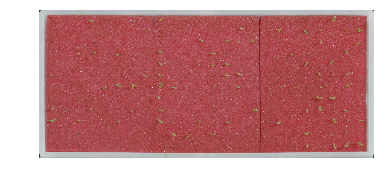

In [5]:
img = data.data_8k[0]
fname = data.data_8knames[0]
print(fname)
plt.imshow(img);
plt.axis('off');

**Green Domination**

In [6]:
img_resize = cv2.resize(img, (img.shape[1]//3, img.shape[0]//3))
img_flatten = img_resize.reshape(-1,3)
img_greendominate = np.array(list(map(lambda x: (0,0,0) if x[1]<np.mean((x[2],x[0])) or np.std(x)<10 else x , img_flatten)))
img_greendominate = img_greendominate.reshape(img_resize.shape)
img_greendominate = img_greendominate.astype(np.uint8)


**morphology**

In [7]:
kernel = np.ones((3, 3), np.uint8)
img_mor = cv2.morphologyEx(img_greendominate, cv2.MORPH_CLOSE, kernel, iterations=1)
img_gray = cv2.cvtColor(img_mor, cv2.COLOR_RGB2GRAY)
ret, img_binary = cv2.threshold(img_gray, threshold_minimum(img_gray), 255, cv2.THRESH_BINARY )

**Contours**

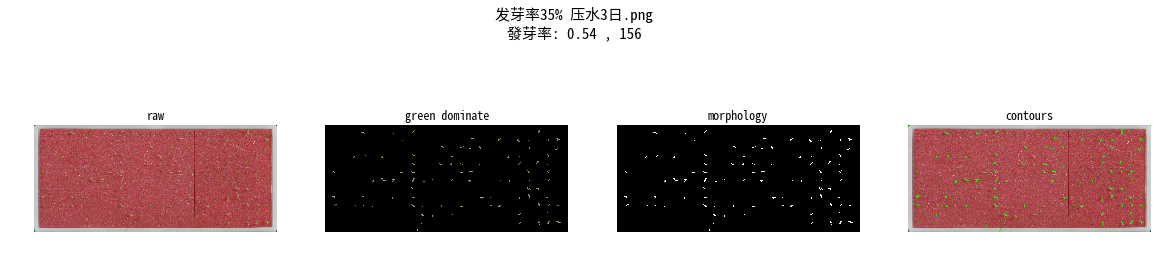

In [12]:
_, contours, _ = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#contours = list(filter(lambda c: cv2.contourArea(c)>100, contours_))
img_contours = img_resize.copy()
cv2.drawContours(img_contours,contours,-1,(0,255,0),3);  


fig = plt.figure(figsize=(20,5))
plt.subplot(141)
plt.imshow(img_resize)
plt.axis("off")
plt.title('raw')
plt.subplot(142)
plt.imshow(img_greendominate)
plt.axis("off")
plt.title('green dominate')
plt.subplot(143)
plt.imshow(img_binary,cmap='gray')
plt.axis("off")
plt.title('morphology')
plt.subplot(144)
plt.imshow(img_contours)
plt.axis("off")
plt.title('contours')
figtitle= f"{fname}\n發芽率: {len(contours)/288:.2} , {len(contours)}"
fig.suptitle(figtitle, fontsize=15)
#plt.tight_layout()
plt.show()

